In [1]:
import netCDF4 as nc
from matplotlib import pyplot as plt
import numpy as np
import glob
import pickle
from salishsea_tools import evaltools as et
import datetime as dt
import os
import re
import cmocean
%matplotlib inline

In [2]:
ignorelist=('nav_lat','nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'bounds_lon','bounds_lat',
            'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 
            'time_counter', 'time_counter_bounds','nav_lat_grid_T', 'nav_lon_grid_T', 
            'bounds_nav_lon_grid_T', 'bounds_nav_lat_grid_T', 'area_grid_T', 
            'nav_lat_grid_W', 'nav_lon_grid_W', 'bounds_nav_lon_grid_W', 
            'bounds_nav_lat_grid_W', 'area_grid_W', 'time_centered', 'time_centered_bounds',
            'depthu', 'depthu_bounds','depthv', 'depthv_bounds','depthw', 'depthw_bounds',
            'layer6m_W', 'layer6m_W_bounds','bounds_lon_grid_T','bounds_lat_grid_T',
            'bounds_lon_grid_W','bounds_lat_grid_W','time_instant_bounds','time_instant')
def checkall(ff):
    fkeys=ff.variables.keys()
    print('fP.variables.keys():',fkeys)
    print('Min/Max:')
    for var in fkeys:
        if var not in ignorelist:
            #print(var)
            if len(np.shape(ff.variables[var]))==4:
                print(var,':',np.min(np.ma.masked_where(tmask[:,:,:]==0,ff.variables[var][-1,:,:,:])),
                      np.max(np.ma.masked_where(tmask[:,:,:]==0,ff.variables[var][-1,:,:,:])))
            elif len(np.shape(ff.variables[var]))==3:
                print(var,':',np.min(np.ma.masked_where(tmask[0,:,:]==0,ff.variables[var][-1,:,:])),
                      np.max(np.ma.masked_where(tmask[0,:,:]==0,ff.variables[var][-1,:,:])))
            else: 
                print('unknown shape: ',var,len(np.shape(ff.variables[var])))
def checkallSlice(ff):
    fkeys=ff.variables.keys()
    print('fP.variables.keys():',fkeys)
    print('Min/Max:')
    for var in fkeys:
        if var not in ignorelist:
            print(var,':',np.min(ff.variables[var][-1,:,:,:]),
                      np.max(ff.variables[var][-1,:,:,:]))

In [3]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    tmask=mesh.variables['tmask'][0,:,:,:]
    e1t=np.expand_dims(mesh.variables['e1t'][:,:,:],1)
    e2t=np.expand_dims(mesh.variables['e2t'][:,:,:],1)
SOGtmaskPath='/ocean/eolson/MEOPAR/northernNO3PaperCalcs/save/SOGtmask.pkl'
(tmaskSOG,_,_,_,_)=pickle.load(open(SOGtmaskPath,'rb'))

In [4]:
idir='/data/sallen/results/MEOPAR/fluxes_elise/'
ts=dt.datetime(2015,1,1)
te=dt.datetime(2015,12,31)

In [5]:
ftype='dian_T'
paths=glob.glob(os.path.join(idir,'*','*'+ftype+'*'))

In [63]:
fPlist=et.index_model_files_flex(idir,'dian_T','1d',ts,te)
fDlist=et.index_model_files_flex(idir,'dia1_T','1d',ts,te)
fD2list=et.index_model_files_flex(idir,'dia2_T','1d',ts,te)
fSlist=et.index_model_files_flex(idir,'snp_T','1d',ts,te)
fRlist=et.index_model_files_flex(idir,'rad_T','1d',ts,te)

In [7]:
fPlist.head()

,paths,t_0,t_n
0,/data/sallen/results/MEOPAR/fluxes_elise/01jan...,2015-01-01,2015-01-06
1,/data/sallen/results/MEOPAR/fluxes_elise/06jan...,2015-01-06,2015-01-11
2,/data/sallen/results/MEOPAR/fluxes_elise/11jan...,2015-01-11,2015-01-16
3,/data/sallen/results/MEOPAR/fluxes_elise/16jan...,2015-01-16,2015-01-21
4,/data/sallen/results/MEOPAR/fluxes_elise/21jan...,2015-01-21,2015-01-26


In [8]:
fDlist.head()

,paths,t_0,t_n
0,/data/sallen/results/MEOPAR/fluxes_elise/01jan...,2015-01-01,2015-01-06
1,/data/sallen/results/MEOPAR/fluxes_elise/06jan...,2015-01-06,2015-01-11
2,/data/sallen/results/MEOPAR/fluxes_elise/11jan...,2015-01-11,2015-01-16
3,/data/sallen/results/MEOPAR/fluxes_elise/16jan...,2015-01-16,2015-01-21
4,/data/sallen/results/MEOPAR/fluxes_elise/21jan...,2015-01-21,2015-01-26


In [9]:
fD2list.head()

,paths,t_0,t_n
0,/data/sallen/results/MEOPAR/fluxes_elise/01jan...,2015-01-01,2015-01-06
1,/data/sallen/results/MEOPAR/fluxes_elise/06jan...,2015-01-06,2015-01-11
2,/data/sallen/results/MEOPAR/fluxes_elise/11jan...,2015-01-11,2015-01-16
3,/data/sallen/results/MEOPAR/fluxes_elise/16jan...,2015-01-16,2015-01-21
4,/data/sallen/results/MEOPAR/fluxes_elise/21jan...,2015-01-21,2015-01-26


In [10]:
fD2list.tail()

,paths,t_0,t_n
67,/data/sallen/results/MEOPAR/fluxes_elise/06dec...,2015-12-06,2015-12-11
68,/data/sallen/results/MEOPAR/fluxes_elise/11dec...,2015-12-11,2015-12-16
69,/data/sallen/results/MEOPAR/fluxes_elise/16dec...,2015-12-16,2015-12-21
70,/data/sallen/results/MEOPAR/fluxes_elise/21dec...,2015-12-21,2015-12-26
71,/data/sallen/results/MEOPAR/fluxes_elise/26dec...,2015-12-26,2016-01-01


In [11]:
fSlist.head()

,paths,t_0,t_n
0,/data/sallen/results/MEOPAR/fluxes_elise/01jan...,2015-01-01,2015-01-06
1,/data/sallen/results/MEOPAR/fluxes_elise/06jan...,2015-01-06,2015-01-11
2,/data/sallen/results/MEOPAR/fluxes_elise/11jan...,2015-01-11,2015-01-16
3,/data/sallen/results/MEOPAR/fluxes_elise/16jan...,2015-01-16,2015-01-21
4,/data/sallen/results/MEOPAR/fluxes_elise/21jan...,2015-01-21,2015-01-26


In [64]:
with nc.Dataset(fRlist.paths[0]) as ff:
    checkall(ff)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'deptht', 'deptht_bounds', 'RDB_NO3', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'RDB_NH4', 'RDB_DON', 'RDB_PON', 'RDB_LIV', 'RDN_NO3', 'RDN_NH4', 'RDN_DON', 'RDN_PON', 'RDN_LIV'])
Min/Max:
RDB_NO3 : 0.0 0.0
RDB_NH4 : 0.0 0.0
RDB_DON : 0.0 0.0
RDB_PON : 0.0 0.0
RDB_LIV : 0.0 0.0017354337
RDN_NO3 : 0.0 0.0
RDN_NH4 : 0.0 0.0
RDN_DON : 0.0 0.0
RDN_PON : 0.0 0.0
RDN_LIV : 0.0 0.017799463


In [12]:
with nc.Dataset(fPlist.paths[0]) as ff:
    checkall(ff)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'deptht', 'deptht_bounds', 'NO3RAD', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'RIV_NO3', 'RIV_NH4', 'REM_NO3', 'REM_PON', 'REM_DON', 'PRD_NO3', 'PRD_NH4', 'REFRN'])
Min/Max:
NO3RAD : 0.0 0.0
RIV_NO3 : 0.0 4302.5117
RIV_NH4 : 0.0 2210.7188
REM_NO3 : 0.0 1.0649589
REM_PON : -0.69764656 -0.0
REM_DON : -1.1225965 -0.0
PRD_NO3 : -0.53126484 -0.0
PRD_NH4 : -0.22364306 -0.0
REFRN : -1.9762651e-06 1.1847648e-21


In [13]:
radNO3Sum=list(); rivNO3Sum=list(); rivNH4Sum=list(); nitrSum=list(); remONSum=list(); prdNO3Sum=list(); 
prdNH4Sum=list(); refrNSum=list();
radSum=list();
for i,r in fPlist.iterrows():
    with nc.Dataset(r['paths']) as f:
        radNO3Sum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['NO3RAD'][:,:,:,:],3),2),1))
        rivNO3Sum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['RIV_NO3'][:,:,:,:],3),2),1))
        rivNH4Sum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['RIV_NH4'][:,:,:,:],3),2),1))
        nitrSum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['REM_NO3'][:,:,:,:],3),2),1))
        remONSum.append(np.sum(np.sum(np.sum(tmaskSOG*(f.variables['REM_DON'][:,:,:,:]+\
                                                       f.variables['REM_PON'][:,:,:,:]),3),2),1))
        prdNO3Sum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['PRD_NO3'][:,:,:,:],3),2),1))
        prdNH4Sum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['PRD_NH4'][:,:,:,:],3),2),1))
        refrNSum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['REFRN'][:,:,:,:],3),2),1))
radNO3Sum=np.concatenate(radNO3Sum,axis=0)
rivNO3Sum=np.concatenate(rivNO3Sum,axis=0)
rivNH4Sum=np.concatenate(rivNH4Sum,axis=0)
nitrSum=np.concatenate(nitrSum,axis=0)
remONSum=np.concatenate(remONSum,axis=0)
prdNO3Sum=np.concatenate(prdNO3Sum,axis=0)
prdNH4Sum=np.concatenate(prdNH4Sum,axis=0)
refrNSum=np.concatenate(refrNSum,axis=0)

In [66]:
rdbNO3Sum=list(); rdbNH4Sum=list(); rdbDONSum=list(); rdbPONSum=list(); rdbLIVSum=list(); 
rdnNO3Sum=list(); rdnNH4Sum=list(); rdnDONSum=list(); rdnPONSum=list(); rdnLIVSum=list(); 
for i,r in fRlist.iterrows():
    with nc.Dataset(r['paths']) as f:
        rdbNO3Sum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['RDB_NO3'][:,:,:,:],3),2),1))
        rdbNH4Sum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['RDB_NH4'][:,:,:,:],3),2),1))
        rdbDONSum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['RDB_DON'][:,:,:,:],3),2),1))
        rdbPONSum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['RDB_PON'][:,:,:,:],3),2),1))
        rdbLIVSum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['RDB_LIV'][:,:,:,:],3),2),1))
        rdnNO3Sum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['RDN_NO3'][:,:,:,:],3),2),1))
        rdnNH4Sum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['RDN_NH4'][:,:,:,:],3),2),1))
        rdnDONSum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['RDN_DON'][:,:,:,:],3),2),1))
        rdnPONSum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['RDN_PON'][:,:,:,:],3),2),1))
        rdnLIVSum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['RDN_LIV'][:,:,:,:],3),2),1))
rdbNO3Sum=np.concatenate(rdbNO3Sum,axis=0)
rdbNH4Sum=np.concatenate(rdbNH4Sum,axis=0)
rdbDONSum=np.concatenate(rdbDONSum,axis=0)
rdbPONSum=np.concatenate(rdbPONSum,axis=0)
rdbLIVSum=np.concatenate(rdbLIVSum,axis=0)
rdnNO3Sum=np.concatenate(rdnNO3Sum,axis=0)
rdnNH4Sum=np.concatenate(rdnNH4Sum,axis=0)
rdnDONSum=np.concatenate(rdnDONSum,axis=0)
rdnPONSum=np.concatenate(rdnPONSum,axis=0)
rdnLIVSum=np.concatenate(rdnLIVSum,axis=0)

In [14]:
with nc.Dataset(fDlist.paths[0]) as ff:
    checkall(ff)

fP.variables.keys(): dict_keys(['nav_lat_grid_T', 'nav_lon_grid_T', 'bounds_lon_grid_T', 'bounds_lat_grid_T', 'area_grid_T', 'deptht', 'deptht_bounds', 'nav_lat_grid_W', 'nav_lon_grid_W', 'bounds_lon_grid_W', 'bounds_lat_grid_W', 'area_grid_W', 'ATF_NO3', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ATF_NH4', 'ATF_DON', 'ATF_PON', 'ATF_LIV', 'BFX_PON', 'BFX_DIAT'])
Min/Max:
ATF_NO3 : -0.30263 0.4201179
ATF_NH4 : -0.06712292 0.13270584
ATF_DON : -0.05748236 0.020460645
ATF_PON : -0.24950893 0.20493895
ATF_LIV : -0.28314927 0.03949129
BFX_PON : -1.482628e-05 -0.0
BFX_DIAT : -4.6959818e-07 -0.0


In [15]:
ATFNO3Sum=list(); ATFNH4Sum=list(); ATFDONSum=list(); ATFPONSum=list(); ATFLIVSum=list();
BFXPONSum=list(); BFXDIATSum=list();
for i,r in fDlist.iterrows():
    with nc.Dataset(r['paths']) as f:
        ATFNO3Sum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['ATF_NO3'][:,:,:,:],3),2),1))
        ATFNH4Sum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['ATF_NH4'][:,:,:,:],3),2),1))
        ATFDONSum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['ATF_DON'][:,:,:,:],3),2),1))
        ATFPONSum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['ATF_PON'][:,:,:,:],3),2),1))
        ATFLIVSum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['ATF_LIV'][:,:,:,:],3),2),1))
        BFXPONSum.append(np.sum(np.sum(tmaskSOG[:,0,:,:]*e1t[:,0,:,:]*e2t[:,0,:,:]*f.variables['BFX_PON'][:,:,:],2),1))
        BFXDIATSum.append(np.sum(np.sum(tmaskSOG[:,0,:,:]*e1t[:,0,:,:]*e2t[:,0,:,:]*f.variables['BFX_DIAT'][:,:,:],2),1))
ATFNO3Sum=np.concatenate(ATFNO3Sum,axis=0)
ATFNH4Sum=np.concatenate(ATFNH4Sum,axis=0)
ATFDONSum=np.concatenate(ATFDONSum,axis=0)
ATFPONSum=np.concatenate(ATFPONSum,axis=0)
ATFLIVSum=np.concatenate(ATFLIVSum,axis=0)
BFXPONSum=np.concatenate(BFXPONSum,axis=0)
BFXDIATSum=np.concatenate(BFXDIATSum,axis=0)

In [16]:
np.shape(e1t)

(1, 1, 898, 398)

In [17]:
with nc.Dataset(fD2list.paths[0]) as ff:
    checkall(ff)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'deptht', 'deptht_bounds', 'PHS_NO3', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'PHS_NH4', 'PHS_DON', 'PHS_PON', 'PHS_LIV', 'SMS_NO3', 'SMS_NH4', 'SMS_DON', 'SMS_PON', 'SMS_LIV'])
Min/Max:
PHS_NO3 : -472.30377 224.7302
PHS_NH4 : -17.904676 17.99093
PHS_DON : -6.113886 5.3810587
PHS_PON : -3.2139356 2.490828
PHS_LIV : -14.371025 19.898054
SMS_NO3 : -0.50178915 1.0649589
SMS_NH4 : -0.5831193 1.1943957
SMS_DON : -0.5167003 0.1842426
SMS_PON : -0.6116187 0.6730085
SMS_LIV : -2.5656474 0.3591419


In [18]:
PHSNO3Sum=list(); PHSNH4Sum=list(); PHSDONSum=list(); PHSPONSum=list(); PHSLIVSum=list();
SMSNO3Sum=list(); SMSNH4Sum=list(); SMSDONSum=list(); SMSPONSum=list(); SMSLIVSum=list();
for i,r in fD2list.iterrows():
    with nc.Dataset(r['paths']) as f:
        PHSNO3Sum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['PHS_NO3'][:,:,:,:],3),2),1))
        PHSNH4Sum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['PHS_NH4'][:,:,:,:],3),2),1))
        PHSDONSum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['PHS_DON'][:,:,:,:],3),2),1))
        PHSPONSum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['PHS_PON'][:,:,:,:],3),2),1))
        PHSLIVSum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['PHS_LIV'][:,:,:,:],3),2),1))
        SMSNO3Sum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['SMS_NO3'][:,:,:,:],3),2),1))
        SMSNH4Sum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['SMS_NH4'][:,:,:,:],3),2),1))
        SMSDONSum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['SMS_DON'][:,:,:,:],3),2),1))
        SMSPONSum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['SMS_PON'][:,:,:,:],3),2),1))
        SMSLIVSum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['SMS_LIV'][:,:,:,:],3),2),1))
PHSNO3Sum=np.concatenate(PHSNO3Sum,axis=0)
PHSNH4Sum=np.concatenate(PHSNH4Sum,axis=0)
PHSDONSum=np.concatenate(PHSDONSum,axis=0)
PHSPONSum=np.concatenate(PHSPONSum,axis=0)
PHSLIVSum=np.concatenate(PHSLIVSum,axis=0)
SMSNO3Sum=np.concatenate(SMSNO3Sum,axis=0)
SMSNH4Sum=np.concatenate(SMSNH4Sum,axis=0)
SMSDONSum=np.concatenate(SMSDONSum,axis=0)
SMSPONSum=np.concatenate(SMSPONSum,axis=0)
SMSLIVSum=np.concatenate(SMSLIVSum,axis=0)

0.11112090812641152 11.590549327243934 0.9999998533446007 0.0 3.1586866387517015e-06


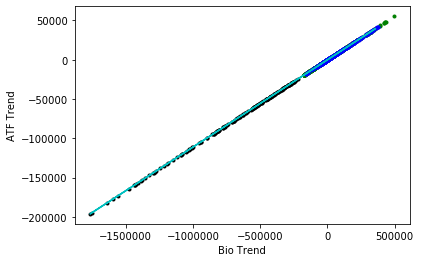

In [19]:
plt.plot(SMSNO3Sum,ATFNO3Sum,'k.',label='ATF trend')
plt.plot(SMSNH4Sum,ATFNH4Sum,'g.',label='ATF trend')
plt.plot(SMSDONSum,ATFDONSum,'b.',label='ATF trend')
plt.plot(SMSNO3Sum,0.1111*SMSNO3Sum,'c-', label='Bio trend * 0.112')
plt.xlabel('Bio Trend')
plt.ylabel('ATF Trend')
from scipy import stats as scst
slope, intercept, r_value, p_value, std_err = scst.linregress(SMSNO3Sum,ATFNO3Sum)
print(slope, intercept, r_value, p_value, std_err)

In [20]:
with nc.Dataset(fSlist.paths[0]) as ff:
    checkall(ff)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'deptht', 'deptht_bounds', 'NO3_E3TSNAP', 'time_instant', 'time_instant_bounds', 'time_counter', 'time_counter_bounds', 'NH4_E3TSNAP', 'PON_E3TSNAP', 'DON_E3TSNAP', 'LIV_E3TSNAP'])
Min/Max:
NO3_E3TSNAP : 0.0 1030.6329
NH4_E3TSNAP : 0.0 25.325794
PON_E3TSNAP : 0.0 2.8652344
DON_E3TSNAP : 0.0 5.211696
LIV_E3TSNAP : 0.0 14.963388


In [21]:
NO3Sum=list(); NH4Sum=list(); DONSum=list(); PONSum=list(); LIVSum=list();
for i,r in fSlist.iterrows():
    with nc.Dataset(r['paths']) as f:
        NO3Sum.append(np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*f.variables['NO3_E3TSNAP'][:,:,:,:],3),2),1))
        NH4Sum.append(np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*f.variables['NH4_E3TSNAP'][:,:,:,:],3),2),1))
        DONSum.append(np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*f.variables['DON_E3TSNAP'][:,:,:,:],3),2),1))
        PONSum.append(np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*f.variables['PON_E3TSNAP'][:,:,:,:],3),2),1))
        LIVSum.append(np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*f.variables['LIV_E3TSNAP'][:,:,:,:],3),2),1))

In [22]:
NO3Sum=np.concatenate(NO3Sum,axis=0)
NH4Sum=np.concatenate(NH4Sum,axis=0)
DONSum=np.concatenate(DONSum,axis=0)
PONSum=np.concatenate(PONSum,axis=0)
LIVSum=np.concatenate(LIVSum,axis=0)

In [23]:
NO3diff=(NO3Sum[1:]-NO3Sum[:-1])/(24*3600)
NH4diff=(NH4Sum[1:]-NH4Sum[:-1])/(24*3600)
PONdiff=(PONSum[1:]-PONSum[:-1])/(24*3600)
DONdiff=(DONSum[1:]-DONSum[:-1])/(24*3600)
LIVdiff=(LIVSum[1:]-LIVSum[:-1])/(24*3600)

Text(0.5, 1.0, 'DON')

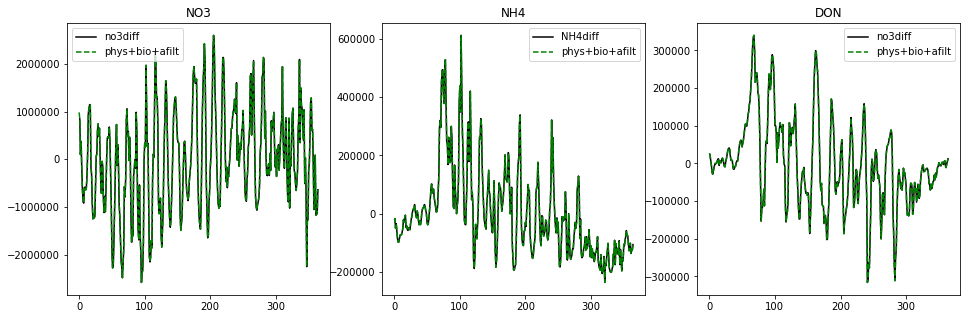

In [24]:
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(range(1,len(NO3diff)+1),NO3diff,'k-',label='no3diff')
ax[0].plot(range(0,len(PHSNO3Sum)),PHSNO3Sum+SMSNO3Sum+ATFNO3Sum,'g--',label='phys+bio+afilt')
ax[0].legend()
ax[0].set_title('NO3')
ax[1].plot(range(1,len(NH4diff)+1),NH4diff,'k-',label='NH4diff')
ax[1].plot(range(0,len(PHSNH4Sum)),PHSNH4Sum+SMSNH4Sum+ATFNH4Sum,'g--',label='phys+bio+afilt')
ax[1].legend()
ax[1].set_title('NH4')
ax[2].plot(range(1,len(DONdiff)+1),DONdiff,'k-',label='no3diff')
ax[2].plot(range(0,len(PHSDONSum)),PHSDONSum+SMSDONSum+ATFDONSum,'g--',label='phys+bio+afilt')
ax[2].legend()
ax[2].set_title('DON')

Text(0.5, 1.0, 'DON')

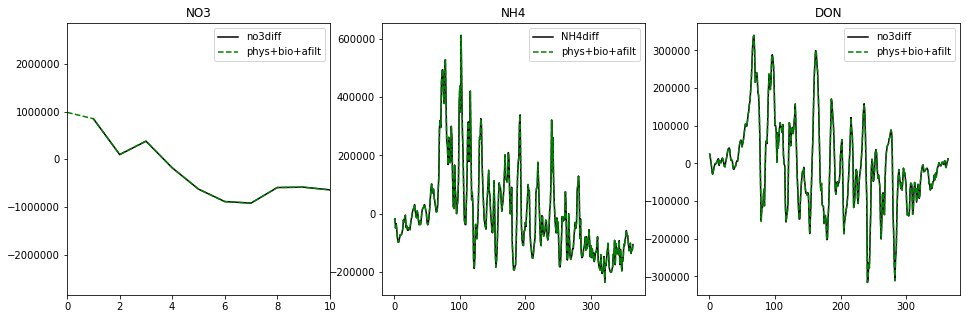

In [25]:
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(range(1,len(NO3diff)+1),NO3diff,'k-',label='no3diff')
ax[0].plot(range(0,len(PHSNO3Sum)),PHSNO3Sum+SMSNO3Sum+ATFNO3Sum,'g--',label='phys+bio+afilt')
ax[0].legend()
ax[0].set_title('NO3')
ax[0].set_xlim((0,10))
ax[1].plot(range(1,len(NH4diff)+1),NH4diff,'k-',label='NH4diff')
ax[1].plot(range(0,len(PHSNH4Sum)),PHSNH4Sum+SMSNH4Sum+ATFNH4Sum,'g--',label='phys+bio+afilt')
ax[1].legend()
ax[1].set_title('NH4')
ax[2].plot(range(1,len(DONdiff)+1),DONdiff,'k-',label='no3diff')
ax[2].plot(range(0,len(PHSDONSum)),PHSDONSum+SMSDONSum+ATFDONSum,'g--',label='phys+bio+afilt')
ax[2].legend()
ax[2].set_title('DON')

(-0.5, 40)

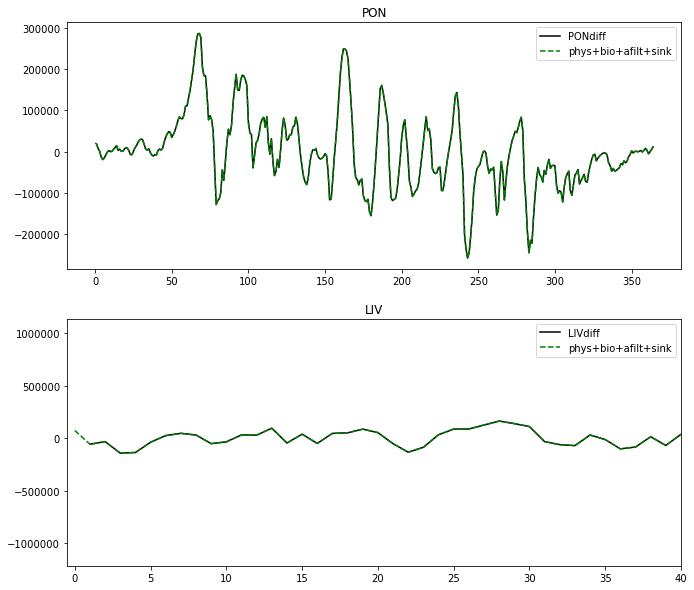

In [26]:
fig,ax=plt.subplots(2,1,figsize=(11,10))
ax[0].plot(range(1,len(PONdiff)+1),PONdiff,'k-',label='PONdiff')
ax[0].plot(range(0,len(PHSPONSum)),PHSPONSum+SMSPONSum+ATFPONSum+BFXPONSum,'g--',label='phys+bio+afilt+sink')
ax[0].legend()
ax[0].set_title('PON')
ax[1].plot(range(1,len(LIVdiff)+1),LIVdiff,'k-',label='LIVdiff')
ax[1].plot(range(0,len(PHSLIVSum)),PHSLIVSum+SMSLIVSum+ATFLIVSum+BFXDIATSum,'g--',label='phys+bio+afilt+sink')
ax[1].legend()
ax[1].set_title('LIV')
ax[1].set_xlim((-.5,40))

(-0.5, 40)

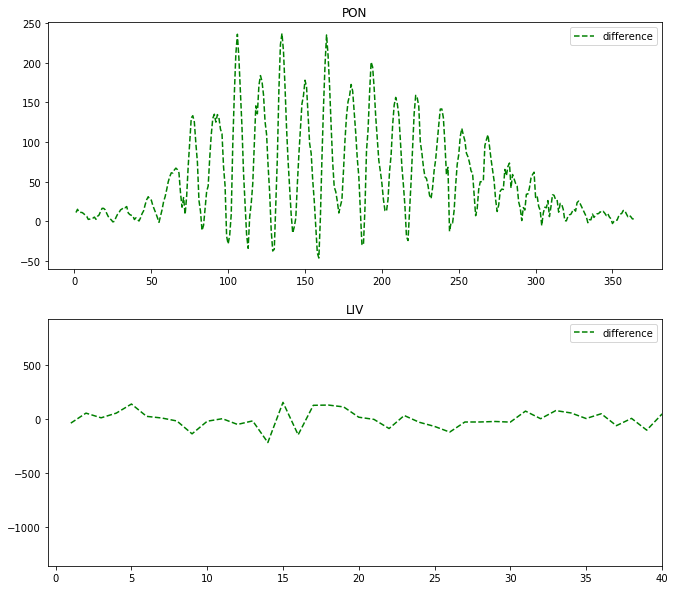

In [27]:
fig,ax=plt.subplots(2,1,figsize=(11,10))
ax[0].plot(range(1,len(PHSPONSum)),PHSPONSum[1:]+SMSPONSum[1:]+ATFPONSum[1:]+BFXPONSum[1:]-PONdiff,'g--',label='difference')
ax[0].legend()
ax[0].set_title('PON')
ax[1].plot(range(1,len(PHSLIVSum)),PHSLIVSum[1:]+SMSLIVSum[1:]+ATFLIVSum[1:]+BFXDIATSum[1:]-LIVdiff,'g--',label='difference')
ax[1].legend()
ax[1].set_title('LIV')
ax[1].set_xlim((-.5,40))

### Look at small differences in sums:

In [28]:
np.sum(radNO3Sum)

12.516972

In [29]:
np.sum(NO3diff)

-4872039.075477794

In [30]:
(NO3Sum[-1]-NO3Sum[0])/(24*3600)

-4872039.075477792

In [31]:
# difference between fluxes and change in N content compared to rivers
np.sum(PHSNO3Sum[1:]+SMSNO3Sum[1:]+ATFNO3Sum[1:]),np.sum(NO3diff),\
np.sum(PHSNO3Sum[1:]+SMSNO3Sum[1:]+ATFNO3Sum[1:])-np.sum(NO3diff),np.sum(rivNO3Sum)


(-4869708.0, -4872039.075477794, 2331.0754777938128, 11269719.0)

In [32]:
varsXr={'ATNO3':'ATX_NO3', 'ATNH4':'ATX_NH4', 'ATPON':'ATX_PON', 'ATDON':'ATX_DON', 'ATLIV':'ATX_LIV', 
        'DTNO3':'DTX_NO3', 'DTNH4':'DTX_NH4', 'DTPON':'DTX_PON', 'DTDON':'DTX_DON', 'DTLIV':'DTX_LIV'}
varsYr={'ATNO3':'ATY_NO3', 'ATNH4':'ATY_NH4', 'ATPON':'ATY_PON', 'ATDON':'ATY_DON', 'ATLIV':'ATY_LIV', 
        'DTNO3':'DTY_NO3', 'DTNH4':'DTY_NH4', 'DTPON':'DTY_PON', 'DTDON':'DTY_DON', 'DTLIV':'DTY_LIV'}
varsX = {v: k for k, v in varsXr.items()}
varsY = {v: k for k, v in varsYr.items()}
locs=('mal','har','sjc','ros','dis','sut')
dirs={'mal':-1,'har':1,'sjc':1,'ros':1,'dis':-1,'sut':-1} # in or out of domain
transps=dict();
fnames={'mal':'Malaspina_U','har':'Haro_V','sjc':'SJC_V','ros':'Rosario_V','dis':'Discovery_V','sut':'Sutil_V'}
for iloc in locs:
    transps[iloc]=dict()

In [33]:
for ivar, inam in varsX.items():
    print(ivar,inam)

ATX_NO3 ATNO3
ATX_NH4 ATNH4
ATX_PON ATPON
ATX_DON ATDON
ATX_LIV ATLIV
DTX_NO3 DTNO3
DTX_NH4 DTNH4
DTX_PON DTPON
DTX_DON DTDON
DTX_LIV DTLIV


In [34]:
# x-dir
iloc='mal'
flist=et.index_model_files_flex(idir,'Malaspina_U','1d',ts,te)
vls=dict()
for inam in varsX.values():
    vls[inam]=list()
for i,r in flist.iterrows():
    with nc.Dataset(r['paths']) as f:
        for ivar, inam in varsX.items():
            vls[inam].append(np.sum(np.sum(f.variables[ivar][:,:,:,0],2),1))
for inam in varsX.values():
    transps[iloc][inam]=dirs[iloc]*np.concatenate(vls[inam],axis=0)

In [35]:
for iloc in ('har','sjc','ros','dis','sut'): # y-dir
    flist=et.index_model_files_flex(idir,fnames[iloc],'1d',ts,te)
    vls=dict()
    for inam in varsY.values():
        vls[inam]=list()
    for i,r in flist.iterrows():
        with nc.Dataset(r['paths']) as f:
            for ivar, inam in varsY.items():
                vls[inam].append(np.sum(np.sum(f.variables[ivar][:,:,0,:],2),1))
    for inam in varsY.values():
        transps[iloc][inam]=dirs[iloc]*np.concatenate(vls[inam],axis=0)

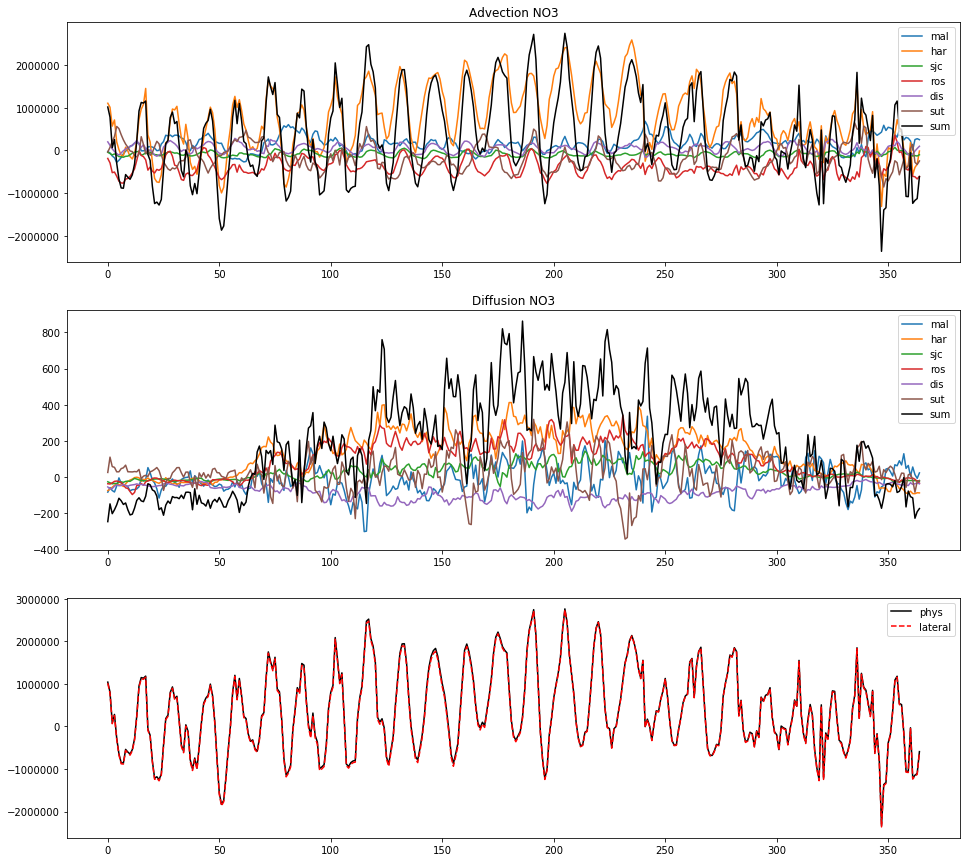

In [36]:
fig,ax=plt.subplots(3,1,figsize=(16,15))
advNO3=np.zeros(np.shape(transps['mal']['ATNO3']))
for iloc in locs:
    ax[0].plot(range(0,len(transps[iloc]['ATNO3'])),transps[iloc]['ATNO3'],label=iloc)
    advNO3=advNO3+transps[iloc]['ATNO3']
ax[0].plot(range(0,len(transps[iloc]['ATNO3'])),advNO3,'k-',label='sum')
ax[0].legend()
ax[0].set_title('Advection NO3')

difNO3=np.zeros(np.shape(transps['mal']['DTNO3']))
for iloc in locs:
    ax[1].plot(range(0,len(transps[iloc]['DTNO3'])),transps[iloc]['DTNO3'],label=iloc)
    difNO3=difNO3+transps[iloc]['DTNO3']
ax[1].plot(range(0,len(transps[iloc]['DTNO3'])),difNO3,'k-',label='sum')
ax[1].legend()
ax[1].set_title('Diffusion NO3')

ax[2].plot(range(0,len(transps[iloc]['DTNO3'])),PHSNO3Sum,'k-',label='phys')
ax[2].plot(range(0,len(transps[iloc]['DTNO3'])),advNO3+difNO3,'r--',label='lateral')
ax[2].legend()

In [46]:
# repeat for all N-containing classes combined
Alist=('ATNO3','ATNH4','ATPON','ATDON','ATLIV')
Dlist=('DTNO3','DTNH4','DTPON','DTDON','DTLIV')
sh=np.shape(transps['mal']['ATNO3'])
for iloc in locs:
    transps[iloc]['ATN']=np.zeros(sh)
    transps[iloc]['DTN']=np.zeros(sh)
    for ivar in Alist:
        transps[iloc]['ATN']=transps[iloc]['ATN']+transps[iloc][ivar]
    for ivar in Dlist:
        transps[iloc]['DTN']=transps[iloc]['DTN']+transps[iloc][ivar]

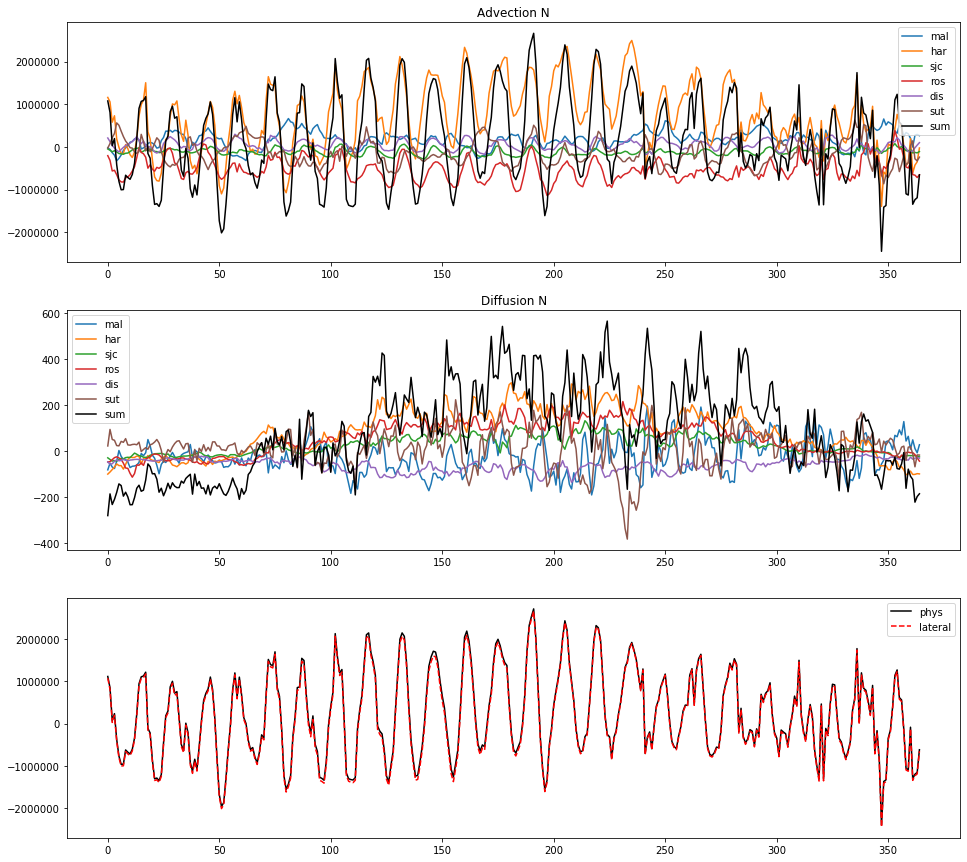

In [47]:
fig,ax=plt.subplots(3,1,figsize=(16,15))
advN=np.zeros(sh)
for iloc in locs:
    ax[0].plot(range(0,len(transps[iloc]['ATN'])),transps[iloc]['ATN'],label=iloc)
    advN=advN+transps[iloc]['ATN']
ax[0].plot(range(0,len(transps[iloc]['ATN'])),advN,'k-',label='sum')
ax[0].legend()
ax[0].set_title('Advection N')

difN=np.zeros(sh)
for iloc in locs:
    ax[1].plot(range(0,len(transps[iloc]['DTN'])),transps[iloc]['DTN'],label=iloc)
    difN=difN+transps[iloc]['DTN']
ax[1].plot(range(0,len(transps[iloc]['DTN'])),difN,'k-',label='sum')
ax[1].legend()
ax[1].set_title('Diffusion N')

ax[2].plot(range(0,len(transps[iloc]['DTN'])),PHSNO3Sum+PHSNH4Sum+PHSDONSum+PHSPONSum+PHSLIVSum,'k-',label='phys')#
ax[2].plot(range(0,len(transps[iloc]['DTN'])),advN+difN,'r--',label='lateral')
ax[2].legend()

## Sums

In [48]:
print('NO3, Mmol/year')
print('Lateral Transport, Advection:\n', np.sum(advNO3)*24*3600*1e-12)
print('Lateral Transport, Mixing: \n',np.sum(difNO3)*24*3600*1e-12)
print('Rivers:\n',np.sum(rivNO3Sum)*24*3600*1e-12)
print('Primary Production: \n',np.sum(prdNO3Sum)*24*3600*1e-12)
print('Nitrification:\n',np.sum(nitrSum)*24*3600*1e-12)
print('Asselin Filter:\n',np.sum(ATFNO3Sum)*24*3600*1e-12)
print('Net change:\n',(np.sum(advNO3)+np.sum(difNO3)+np.sum(rivNO3Sum)+np.sum(prdNO3Sum)+np.sum(nitrSum)+\
                      np.sum(ATFNO3Sum))*24*3600*1e-12)
#print('Tansport+Rivers+Phytoplankton+Nitrification+Filter:\n',(np.sum(adv[:-1])+np.sum(dif[:-1])+np.sum(rivSum[:-1])\
#                                                               -np.sum(PPSum[:-1])+np.sum(nitrSum[:-1])+np.sum(afiltSum[:-1]))*24*3600*1e-12)

NO3, Mmol/year
Lateral Transport, Advection:
 10.606281793474219
Lateral Transport, Mixing: 
 0.006219199834336996
Rivers:
 0.9737037216
Primary Production: 
 -26.8935303168
Nitrification:
 16.1642566656
Asselin Filter:
 -1.1918812608
Net change:
 -0.3349501970914455


In [57]:
print('NO3, Mmol/year, ATF-Corrected version')
print('Lateral Transport, Advection:\n', np.sum(advNO3)*24*3600*1e-12)
print('Lateral Transport, Mixing: \n',np.sum(difNO3)*24*3600*1e-12)
print('Rivers:\n',np.sum(rivNO3Sum)*24*3600*1e-12)
print('NO3-based Primary Production: \n',np.sum(prdNO3Sum)*24*3600*1e-12*1.111)
print('NH4-based Primary Production: \n',np.sum(prdNH4Sum)*24*3600*1e-12*1.111)
print('Nitrification:\n',np.sum(nitrSum)*24*3600*1e-12*1.111)
print('Net change:\n',(np.sum(advNO3)+np.sum(difNO3)+np.sum(rivNO3Sum)+np.sum(prdNO3Sum)*1.111+np.sum(nitrSum)*1.111\
                      )*24*3600*1e-12)

NO3, Mmol/year, ATF-Corrected version
Lateral Transport, Advection:
 10.606281793474219
Lateral Transport, Mixing: 
 0.006219199834336996
Rivers:
 0.9737037216
NO3-based Primary Production: 
 -29.8787121819648
NH4-based Primary Production: 
 -19.9798964665344
Nitrification:
 17.9584891554816
Net change:
 -0.334018311574647


In [50]:
print('DIN (NH4+NO3) from Rivers:',(np.sum(rivNO3Sum)+np.sum(rivNH4Sum))*24*3600*1e-12)

DIN (NH4+NO3) from Rivers: 1.6409051712


In [52]:
# Haro:
print('Haro Strait NO3:',(np.sum(transps['har']['ATNO3']))*24*3600*1e-12)
print('Haro Strait NH4:',(np.sum(transps['har']['ATNH4']))*24*3600*1e-12)
print('Haro Strait DIN:',(np.sum(transps['har']['ATNO3'])+np.sum(transps['har']['ATNH4']))*24*3600*1e-12)
print('Haro Strait PON:',(np.sum(transps['har']['ATPON']))*24*3600*1e-12)
print('Haro Strait DON:',(np.sum(transps['har']['ATDON']))*24*3600*1e-12)
print('Haro Strait Living:',(np.sum(transps['har']['ATLIV']))*24*3600*1e-12)

Haro Strait NO3: 24.062717952
Haro Strait NH4: 0.4372993872
Haro Strait DIN: 24.5000180736
Haro Strait PON: 0.2491179408
Haro Strait DON: -0.7666901856
Haro Strait Living: -1.2936449088


In [54]:
# Southern Passages:
print('Southern NO3:',(np.sum(transps['har']['ATNO3'])+np.sum(transps['sjc']['ATNO3'])+np.sum(transps['ros']['ATNO3']))*24*3600*1e-12)
print('Southern NH4:',(np.sum(transps['har']['ATNH4'])+np.sum(transps['sjc']['ATNH4'])+np.sum(transps['ros']['ATNH4']))*24*3600*1e-12)
print('Southern DIN:',(np.sum(transps['har']['ATNO3'])+np.sum(transps['sjc']['ATNO3'])+np.sum(transps['ros']['ATNO3'])+\
                       np.sum(transps['har']['ATNH4'])+np.sum(transps['sjc']['ATNH4'])+np.sum(transps['ros']['ATNH4']))*24*3600*1e-12)
print('Southern PON:',(np.sum(transps['har']['ATPON'])+np.sum(transps['sjc']['ATPON'])+np.sum(transps['ros']['ATPON']))*24*3600*1e-12)
print('Southern DON:',(np.sum(transps['har']['ATDON'])+np.sum(transps['sjc']['ATDON'])+np.sum(transps['ros']['ATDON']))*24*3600*1e-12)
print('Southern Living:',(np.sum(transps['har']['ATLIV'])+np.sum(transps['sjc']['ATLIV'])+np.sum(transps['ros']['ATLIV']))*24*3600*1e-12)

Southern NO3: 9.4590830592
Southern NH4: -1.1575968768
Southern DIN: 8.3014861824
Southern PON: -0.2869930224
Southern DON: -2.0933149248
Southern Living: -3.2257070208


In [55]:
# Northern Passages:
print('Northern NO3:',(np.sum(transps['dis']['ATNO3'])+np.sum(transps['mal']['ATNO3'])+np.sum(transps['sut']['ATNO3']))*24*3600*1e-12)
print('Northern NH4:',(np.sum(transps['dis']['ATNH4'])+np.sum(transps['mal']['ATNH4'])+np.sum(transps['sut']['ATNH4']))*24*3600*1e-12)
print('Northern DIN:',(np.sum(transps['dis']['ATNO3'])+np.sum(transps['mal']['ATNO3'])+np.sum(transps['sut']['ATNO3'])+\
                       np.sum(transps['dis']['ATNH4'])+np.sum(transps['mal']['ATNH4'])+np.sum(transps['sut']['ATNH4']))*24*3600*1e-12)
print('Northern PON:',(np.sum(transps['dis']['ATPON'])+np.sum(transps['mal']['ATPON'])+np.sum(transps['sut']['ATPON']))*24*3600*1e-12)
print('Northern DON:',(np.sum(transps['dis']['ATDON'])+np.sum(transps['mal']['ATDON'])+np.sum(transps['sut']['ATDON']))*24*3600*1e-12)
print('Northern Living:',(np.sum(transps['dis']['ATLIV'])+np.sum(transps['mal']['ATLIV'])+np.sum(transps['sut']['ATLIV']))*24*3600*1e-12)

Northern NO3: 1.1471991552
Northern NH4: 0.423793296
Northern DIN: 1.5709923648
Northern PON: 0.1674645084
Northern DON: 0.22528488959999998
Northern Living: 0.4831773552


In [59]:
# bio fluxes
print('NO3-based Primary Production: \n',np.sum(prdNO3Sum)*24*3600*1e-12*1.111)
print('NH4-based Primary Production: \n',np.sum(prdNH4Sum)*24*3600*1e-12*1.111)
print('Nitrification:\n',np.sum(nitrSum)*24*3600*1e-12*1.111)
print('PON&DON->NH4:\n',np.sum(remONSum)*24*3600*1e-12*1.111)
print('To Refractory N:\n',np.sum(refrNSum)*24*3600*1e-12*1.111)

NO3-based Primary Production: 
 -29.8787121819648
NH4-based Primary Production: 
 -19.9798964665344
Nitrification:
 17.9584891554816
PON&DON->NH4:
 -35.5858313969664
To Refractory N:
 -0.000146721232659375


In [61]:
# bottom flux
print('Bottom flux diatoms: \n',np.sum(BFXDIATSum)*24*3600*1e-12*1.111)
print('Bottom flux PON: \n',np.sum(BFXPONSum)*24*3600*1e-12*1.111)

Bottom flux diatoms: 
 -0.08909881947858513
Bottom flux PON: 
 -6.54467851044067


In [67]:
# RAD
print('rad correction:')
print('    NO3: \n',(np.sum(rdnNO3Sum)+np.sum(rdbNO3Sum))*24*3600*1e-12)
print('    NH4: \n',(np.sum(rdnNH4Sum)+np.sum(rdbNH4Sum))*24*3600*1e-12)
print('    DON: \n',(np.sum(rdnDONSum)+np.sum(rdbDONSum))*24*3600*1e-12)
print('    PON: \n',(np.sum(rdnPONSum)+np.sum(rdbPONSum))*24*3600*1e-12)
print(' Living: \n',(np.sum(rdnLIVSum)+np.sum(rdbLIVSum))*24*3600*1e-12)

rad correction:
    NO3: 
 8.6516869921875e-05
    NH4: 
 3.0026023681640626e-06
    DON: 
 5.7666779296875e-06
    PON: 
 0.0
 Living: 
 1.3564822412109375e-05


In [68]:
1/1.111111

0.900000090000009